**Created by : ZEID ZEIN ALABDEEN**

**Data Scientist | Data Analyst | Artificial Intelligence Developer**

> **Linked in:** **[zeid-zein](https://www.linkedin.com/in/zeid-zein/ "My Linked in Account.")** **Github:** **[zeidzen](https://github.com/zeidzen "My Github Account.")** **Kaggle:** **[ziedzen](https://www.kaggle.com/ziedzen "My Kaggle Account.")**

# <center><font size=6> **Project Descroption** 🎯<font><center>

**The client, a leading UK grocery retailer, is keen on accurately forecasting weekly sales volumes based on historical transactional data. Additionally, they are interested in comprehending how pricing strategies impact sales volume and are seeking recommendations in this regard.**

<img src="https://assets.epicurious.com/photos/57eebe2eb382c3c017d3fff0/16:9/w_2560%2Cc_limit/supermarket-shelves.jpg">

# **TABLE OF CONTENTS**

- **[1.Import and Insatll Libraries ⭕](#1)**
    
- **[2. Load Datasets 🧮](#2)**
    
- **[3. Exploratory data analysis](#3)**
    - ***[3.1 Over View](#3.1)***
    - ***[3.2 Missing and Duplicated Data checking](#3.2)***    
    - ***[3.3 Product Analysis](#3.3)***
    - ***[3.4 Price Changes Analysis](#3.4)***
    - ***[3.5 Sales Small Analysis](#3.5)*** 
    <br>
    <br>
- **[4. Forecasting Weekly sales](#4)**
- **[5. Impact of Pricing on Sales](#5)**
- **[6 Pricing Strategy Recommendations](#6)**
    
    
    

# **Import and Install Libraries** <a id="1"></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt ; plt.rcdefaults()
import seaborn as sns
import missingno as msno
from IPython.display import display

import scipy.stats
import pylab
import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import acorr_ljungbox

# **Load Datasets** <a id="2"></a>

In [2]:
# Read Datasets ( price_changes , products , sales_small )
## get paths 
price_changes_path = '/kaggle/input/uk-grocery-retailer-sales-and-pricing-analysis/price_changes.csv'
products_path = '/kaggle/input/uk-grocery-retailer-sales-and-pricing-analysis/products.csv'
sales_small_path = '/kaggle/input/uk-grocery-retailer-sales-and-pricing-analysis/sales_small.csv'
## Read data as DataFrame 
products = pd.read_csv(products_path)
price_changes = pd.read_csv(price_changes_path)
sales_small = pd.read_csv(sales_small_path)

In [3]:
display(products.sample(3))
display(price_changes.sample(3))
display(sales_small.sample(3))

,products.ProductID,products.Season,products.Group,products.SubGroup,products.Class,products.SubClass
3847,52bdcb27,L,606565a1,9d3d7fe0,7432d9ca,9d958d1e
5270,a618742a,L,606565a1,33de6bfe,57dedfae,e5db0621
8199,c3bcbb98,L,bca94c97,c830b21c,7f5a3521,d09982e0


,price_changes.ProductID,price_changes.WeekKey,price_changes.Channel,price_changes.Country,price_changes.OSP,price_changes.previous_CSP,price_changes.CSP
1782,219ebff,201533,Stores,A,18.759,14.663,12.322
14335,9535e3c4,201607,Stores,B,18.084,18.084,14.033
2301,2690dab8,201519,Stores,B,12.457,12.457,10.882


,sales_small.ProductID,sales_small.Channel,sales_small.Country,sales_small.WeekKey,sales_small.CSP,sales_small.SalesVolume,sales_small.TotalStockVolume,sales_small.StoreStockVolume,sales_small.DepotStockVolume,sales_small.FutureCommitmentVolume,sales_small.IntakeVolume,sales_small.StoresWithStockCount,sales_small.StoresWithSalesCount
32146,994600fe,Online,B,201552,18.984,2,3,0,3,0,0,0.0039,0.0039
76,fe4f3f4b,Stores,A,201502,20.334,3,6,6,0,0,0,0.1399,0.0078
17212,efd54267,Stores,B,201531,10.432,9,4,4,0,0,0,0.7423,0.0428


# **Exploratory data analysis** <a id="3"></a>

## ***Dataset Oveview***
<a id="3.1"></a>

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   products.ProductID  9205 non-null   object
 1   products.Season     9205 non-null   object
 2   products.Group      9205 non-null   object
 3   products.SubGroup   9205 non-null   object
 4   products.Class      9205 non-null   object
 5   products.SubClass   9205 non-null   object
dtypes: object(6)
memory usage: 431.6+ KB


In [5]:
price_changes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25809 entries, 0 to 25808
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_changes.ProductID     25809 non-null  object 
 1   price_changes.WeekKey       25809 non-null  int64  
 2   price_changes.Channel       25809 non-null  object 
 3   price_changes.Country       25809 non-null  object 
 4   price_changes.OSP           25809 non-null  float64
 5   price_changes.previous_CSP  25809 non-null  float64
 6   price_changes.CSP           25809 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [6]:
sales_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44167 entries, 0 to 44166
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   sales_small.ProductID               44167 non-null  object 
 1   sales_small.Channel                 44167 non-null  object 
 2   sales_small.Country                 44167 non-null  object 
 3   sales_small.WeekKey                 44167 non-null  int64  
 4   sales_small.CSP                     44167 non-null  float64
 5   sales_small.SalesVolume             44167 non-null  int64  
 6   sales_small.TotalStockVolume        44167 non-null  int64  
 7   sales_small.StoreStockVolume        44167 non-null  int64  
 8   sales_small.DepotStockVolume        44167 non-null  int64  
 9   sales_small.FutureCommitmentVolume  44167 non-null  int64  
 10  sales_small.IntakeVolume            44167 non-null  int64  
 11  sales_small.StoresWithStockCount    44167

In [7]:
# Define a function to rename columns
def rename_columns(df):
    # Create a new DataFrame to store renamed columns
    new_dataframe = pd.DataFrame()
    # Iterate through the columns of the input DataFrame
    for col in df.columns:
        # Split the column name using '.' and take the second part (index 1) as the new name
        new_name = col.split('.')[1]
        # Assign the column to the new DataFrame with the updated name
        new_dataframe[new_name] = df[col]
    # Return the DataFrame with renamed columns
    return new_dataframe


# Renaming columns in the 'products' DataFrame
products = rename_columns(products)

# Renaming columns in the 'price_changes' DataFrame
price_changes = rename_columns(price_changes)

# Renaming columns in the 'sales_small' DataFrame
sales_small = rename_columns(sales_small)

In [8]:
# Display a random sample of 3 rows from the 'products' DataFrame
display(products.sample(3))

# Display a random sample of 3 rows from the 'price_changes' DataFrame
display(price_changes.sample(3))

# Display a random sample of 3 rows from the 'sales_small' DataFrame
display(sales_small.sample(3))


,ProductID,Season,Group,SubGroup,Class,SubClass
6724,108186f6,L,26387251,c3567a18,8face522,cbfb9701
6747,1ec0c763,L,606565a1,9d3d7fe0,4b4aee60,16fbe41a
3622,6df37999,L,c8e7b2df,fb23693f,fb23693f,fb23693f


,ProductID,WeekKey,Channel,Country,OSP,previous_CSP,CSP
2596,29517801,201512,Stores,B,13.133,13.133,12.007
4022,3513ecee,201507,Stores,B,17.183,17.183,14.483
11743,7eaaf26e,201524,Stores,B,12.232,11.332,10.882


,ProductID,Channel,Country,WeekKey,CSP,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,IntakeVolume,StoresWithStockCount,StoresWithSalesCount
29694,1de227b0,Stores,A,201550,18.084,2,1,1,0,0,0,0.0700,0.0039
30184,9f697130,Online,B,201550,15.383,1,0,0,0,0,0,0.0039,0.0000
43266,6e4e484e,Stores,B,201609,12.232,45,12,12,0,0,0,0.5363,0.0933



## ***Missing and Duplicated Data checking***
<a id="3.2"></a>

<Axes: >

<Axes: >

<Axes: >

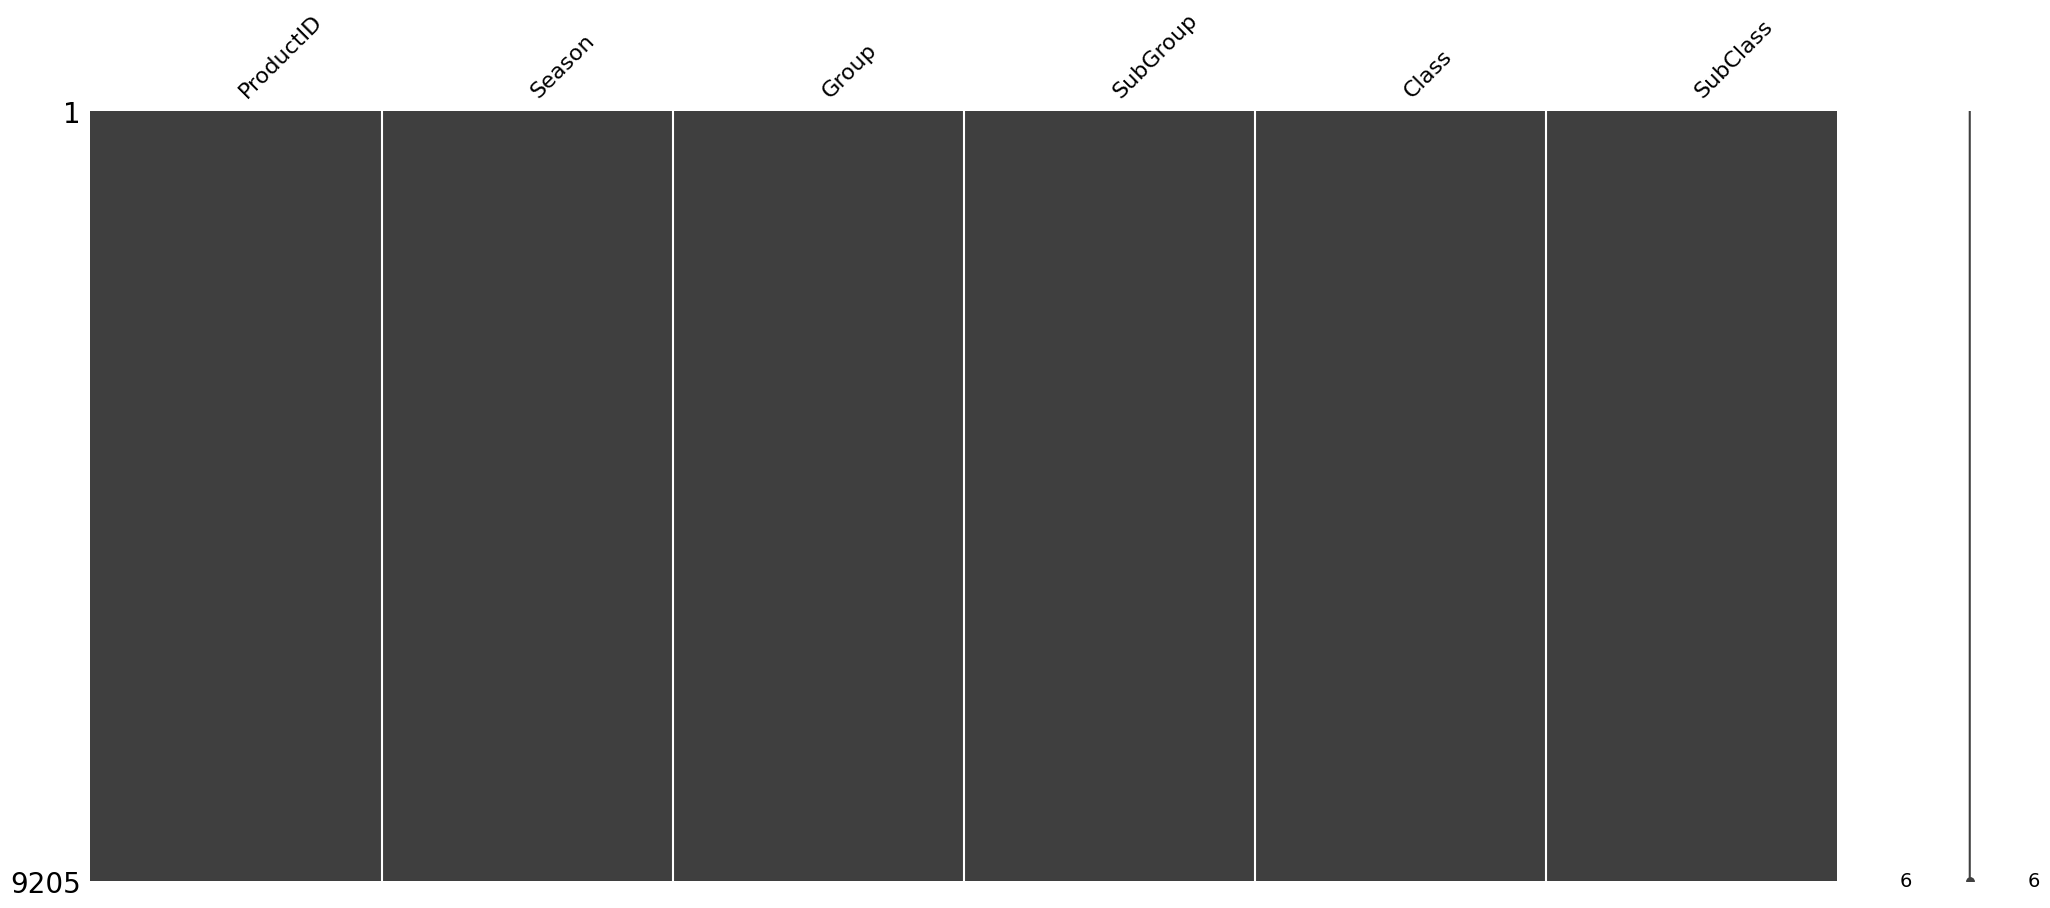

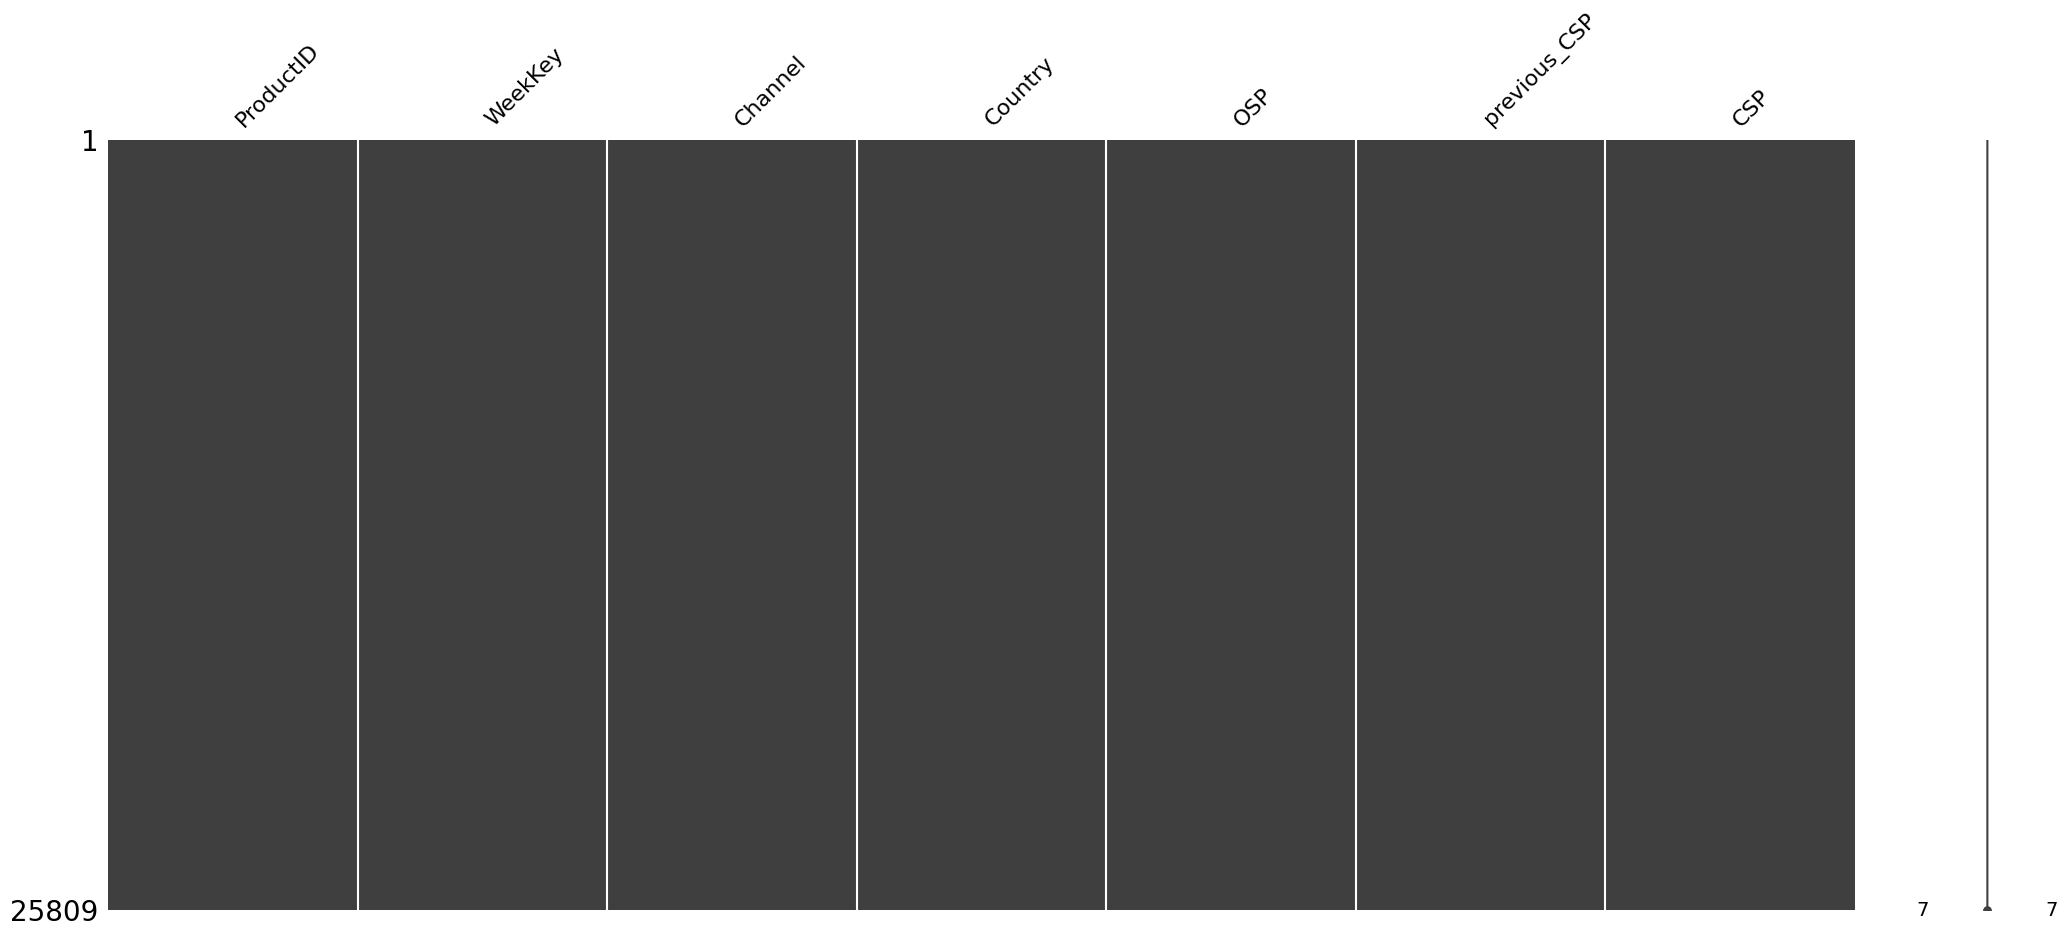

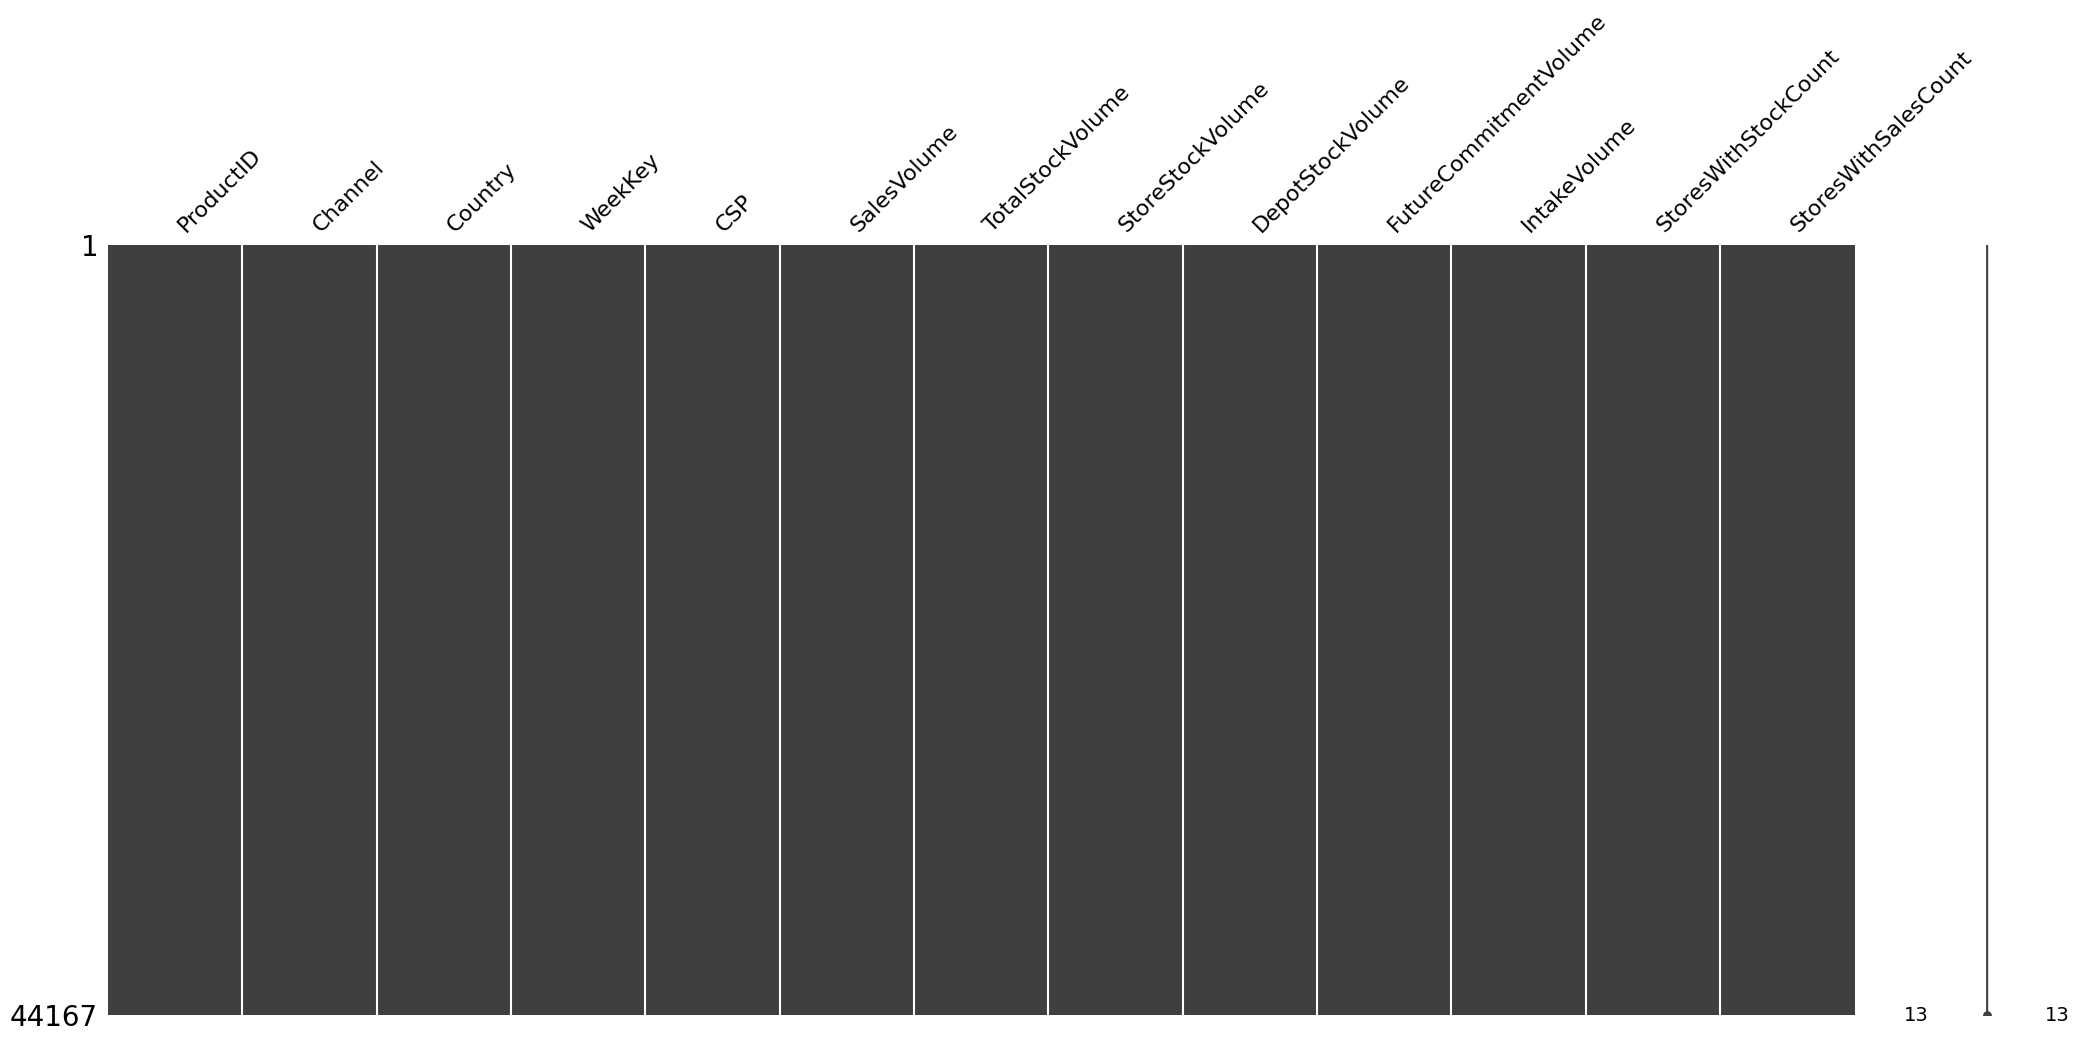

In [9]:
# Display a matrix of missing values for the 'products', 'price_changes' and 
#'sales_small' DataFrames

display(msno.matrix(products))

display(msno.matrix(price_changes))

display(msno.matrix(sales_small))

In [10]:
# Check for and remove duplicated rows in the 'products' DataFrame
products_duplicates = products[products.duplicated()]
display(f"Number of Duplicated rows in 'products': {len(products_duplicates)}")

# Check for and remove duplicated rows in the 'price_changes' DataFrame
price_changes_duplicates = price_changes[price_changes.duplicated()]
display(f"Number of Duplicated rows in 'price_changes': {len(price_changes_duplicates)}")

# Check for and remove duplicated rows in the 'sales_small' DataFrame
sales_small_duplicates = sales_small[sales_small.duplicated()]
display(f"Number of Duplicated rows in 'sales_small': {len(sales_small_duplicates)}")


"Number of Duplicated rows in 'products': 0"

"Number of Duplicated rows in 'price_changes': 0"

"Number of Duplicated rows in 'sales_small': 0"

## ***Products Analysis***
<a id="3.3"></a>

In [11]:
# Display the first few rows of the 'products' DataFrame
products.head()

,ProductID,Season,Group,SubGroup,Class,SubClass
0,110e1664,L,606565a1,33de6bfe,57dedfae,e5db0621
1,11430072,L,bca94c97,44b005af,bb900370,fed6cf53
2,11660a96,L,606565a1,33de6bfe,8f5e4e2f,52fc415a
3,116e2878,L,26387251,14edd834,96d57a3c,62defb1f
4,1.19E+81,L,606565a1,33de6bfe,8f5e4e2f,52fc415a


In [12]:
# Randomly sample 5 rows from the 'products' DataFrame
products.sample(5)

,ProductID,Season,Group,SubGroup,Class,SubClass
922,8a1b2bed,L,bca94c97,44b005af,4a5b1ef4,788e1264
7748,f4eb8e20,L,bca94c97,44b005af,4a5b1ef4,788e1264
9087,a0962b8c,L,edf80f3a,edf80f3a,475fad98,76b05919
6173,24e64270,L,49e9a58f,71eae2d8,fc68ea0a,7075f0ca
2768,9a6b2815,L,26387251,14edd834,96d57a3c,62defb1f


Season
L    9192
R      13
Name: count, dtype: int64

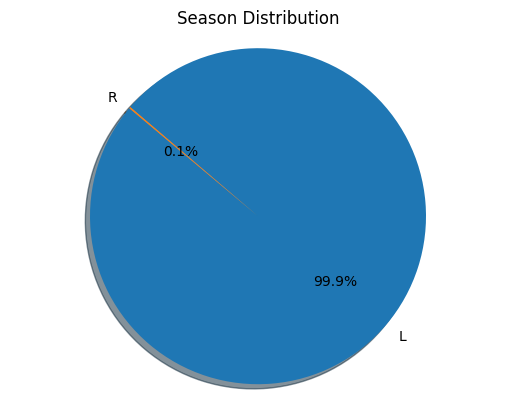

In [13]:
# Get the count of unique values in the 'Season' column of the 'products' DataFrame
count_values = products['Season'].value_counts()

# Display the count of each unique value
display(count_values)

# Plot a pie chart to visualize the distribution of 'Season' values
plt.title('Season Distribution')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts

plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot

'Number of Groups: 7'

Group
26387251    3585
bca94c97    2475
606565a1    1463
edf80f3a    1273
c8e7b2df     309
3bc0de94      56
49e9a58f      44
Name: count, dtype: int64

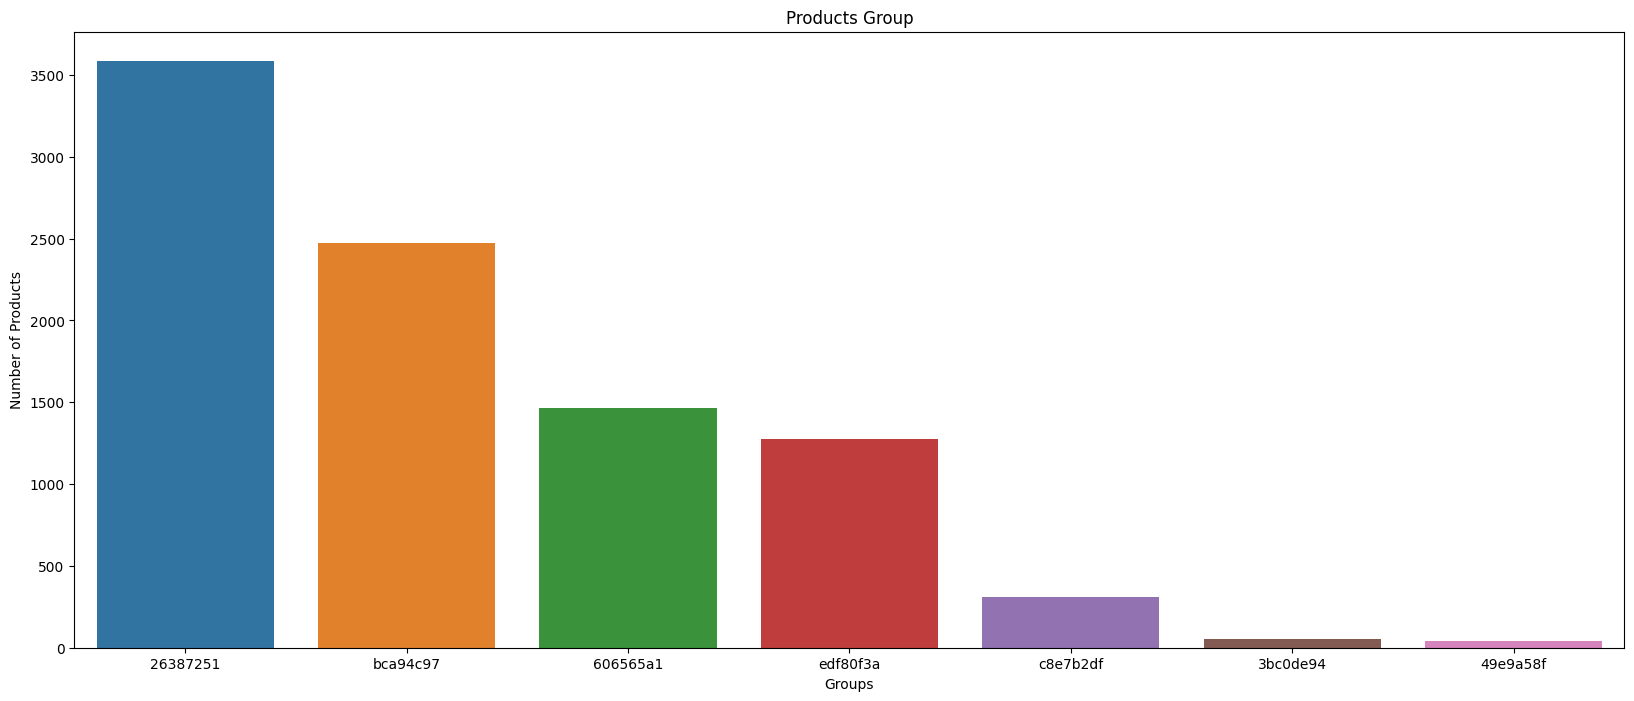

In [14]:
# Get the count of unique values in the 'Group' column of the 'products' DataFrame
count_values = products['Group'].value_counts()

# Display the total number of unique 'Group' values
display('Number of Groups: {}'.format(len(count_values)))

# Display the count of each unique value
display(count_values)

# Plot a bar chart to visualize the distribution of 'Group' values
plt.figure(figsize=(20,8))  # Set the figure size for better visibility
sns.barplot(x=count_values.index ,y=count_values.values)  # Create a bar plot
plt.xlabel('Groups')  # Set the label for the x-axis
plt.ylabel('Number of Products')  # Set the label for the y-axis
plt.title('Products Group')  # Add a title to the plot
plt.show()  # Display the plot


'Number of SubGroups: 17'

SubGroup
c3567a18    2068
edf80f3a    1240
44b005af    1226
14edd834    1162
c830b21c     869
33de6bfe     846
9d3d7fe0     417
cd1e4750     355
8f7078c4     315
c8e7b2df     266
eb5237dd     195
cddaa128      65
c3257b11      56
71eae2d8      44
fb23693f      43
b5ae3139      33
a8ef1330       5
Name: count, dtype: int64

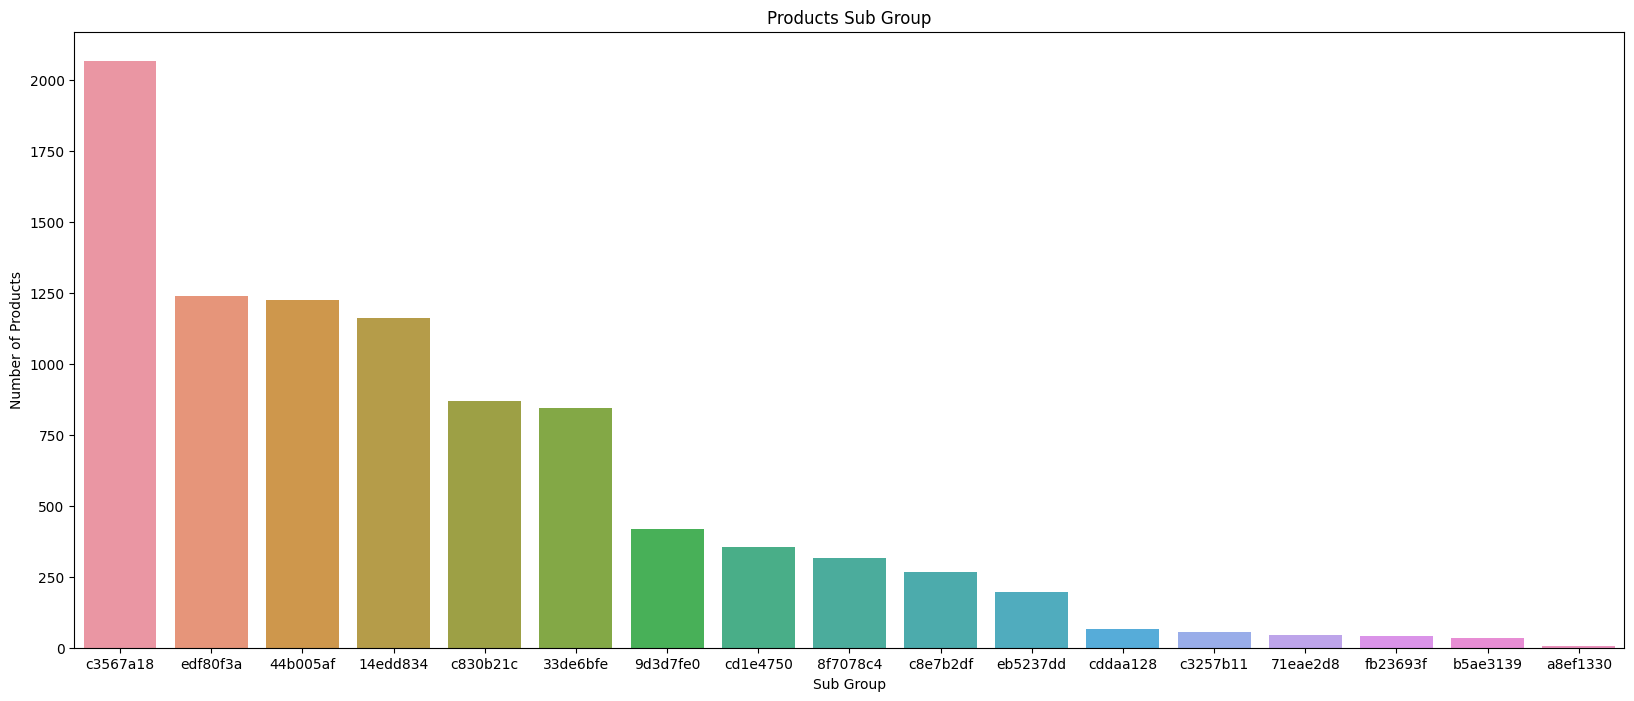

In [15]:
# Get the count of unique values in the 'SubGroup' column of the 'products' DataFrame
count_values = products['SubGroup'].value_counts()
# Dispaly the total number of unique 'SubGroup' values
display('Number of SubGroups: {}'.format(len(count_values)))

# Display the count of each unique value
display(count_values)

# Plot a bar chart to visualize the distribution of 'SubGroup' values
plt.figure(figsize=(20,8))  # Set the figure size for better visibility
sns.barplot(x=count_values.index ,y=count_values.values)  # Create a bar plot
plt.xlabel('Sub Group')  # Set the label for the x-axis
plt.ylabel('Number of Products')  # Set the label for the y-axis
plt.title('Products Sub Group')  # Add a title to the plot
plt.show()  # Display the plot

In [16]:
# Get the count of unique values in the 'Class' column of the 'products' DataFrame
count_values = products['Class'].value_counts()
# Display the number of unique 'Class' values
display('Number of Classes: {}'.format(len(count_values)))

'Number of Classes: 44'

In [17]:
# Get the count of unique values in the 'Class' column of the 'products' DataFrame
count_values = products['SubClass'].value_counts()
# Display the number of unique 'Class' values
display('Number of SubClass: {}'.format(len(count_values)))

'Number of SubClass: 102'

## **Price Changes Analysis**
<a id="3.4"></a>

In [18]:
# Display first five rows
price_changes.head()

,ProductID,WeekKey,Channel,Country,OSP,previous_CSP,CSP
0,100ba933,201603,Stores,B,18.084,18.084,14.033
1,100ba933,201609,Stores,B,18.084,14.033,12.683
2,101cfc62,201607,Stores,B,23.035,23.035,16.733
3,1021879c,201541,Online,B,13.583,14.483,13.583
4,10328ad7,201517,Online,B,15.383,15.383,13.133


Channel
Stores    17097
Online     8712
Name: count, dtype: int64

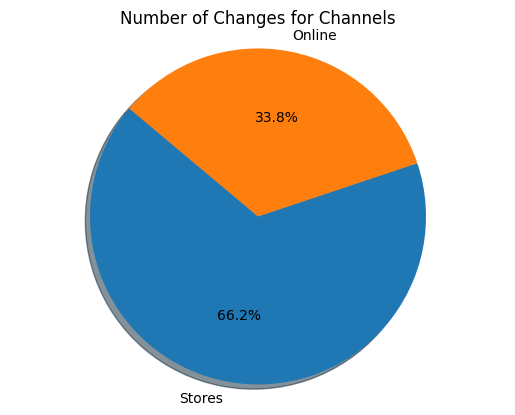

In [19]:
# Get the count of unique values in the 'Channel' column of the 'price_changes' DataFrame
count_values = price_changes['Channel'].value_counts()
# Display the count of each unique value
display(count_values)
# Plot a pie chart to visualize the distribution of 'Channel' values
plt.title('Number of Changes for Channels')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot


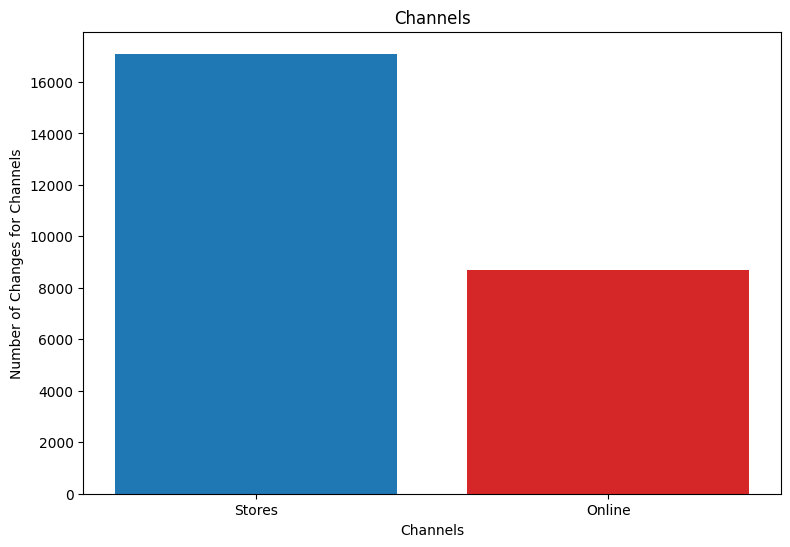

In [20]:
# Get the count of unique values in the 'Channel' column of the 'price_changes' DataFrame
count_values = price_changes['Channel'].value_counts()
# Extract labels and values for the bar chart
labels = count_values.index
values = count_values.values
# Create a bar chart to visualize the distribution of 'Channel' values
plt.figure(figsize=(9, 6))  # Set the figure size for better visibility
plt.bar(labels, values, color=['#1f77b4', '#d62728', 'lightcoral', '#7f7f7f'])  # Create the bar chart
plt.xlabel('Channels')  # Set the label for the x-axis
plt.ylabel('Number of Changes for Channels')  # Set the label for the y-axis
plt.title('Channels')  # Add a title to the plot
plt.show()  # Display the plot


Country
B    18265
A     7544
Name: count, dtype: int64

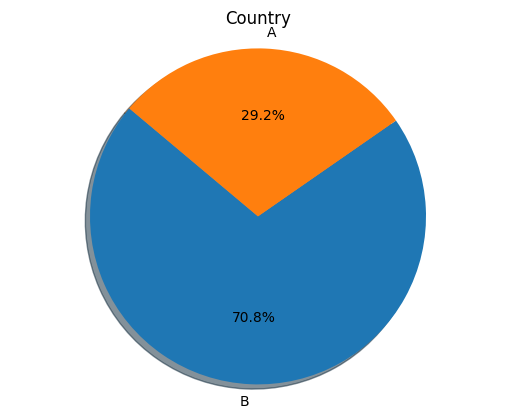

In [21]:
# Get the count of unique values in the 'Country' column of the 'price_changes' DataFrame
count_values = price_changes['Country'].value_counts()
# Display the count of each unique value
display(count_values)
# Plot a pie chart to visualize the distribution of 'Country' values
plt.title('Country')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot


## **Sales Small Analysis**
<a id="3.5"></a>

In [22]:
# Display first five rows
sales_small.head()

,ProductID,Channel,Country,WeekKey,CSP,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,IntakeVolume,StoresWithStockCount,StoresWithSalesCount
0,135fc45e,Stores,B,201502,18.984,3,39,6,33,0,0,0.10100,0.0078
1,1ff41410,Stores,A,201502,15.833,2,2,2,0,0,0,0.24100,0.0389
2,22125db2,Stores,B,201502,18.084,1,6,2,3,0,1,0.06220,0.0039
3,25e07883,Stores,B,201502,13.583,6,6,2,4,0,0,0.02328,0.0194
4,2729a59e,Stores,B,201502,14.483,8,117,7,8,102,0,0.22930,0.0350


In [23]:
# Display last five rows
sales_small.tail()

,ProductID,Channel,Country,WeekKey,CSP,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,IntakeVolume,StoresWithStockCount,StoresWithSalesCount
44162,ffa28e85,Stores,A,201609,10.270,0,0,0,0,0,0,0.0000,0.0000
44163,ffa28e85,Stores,B,201609,10.207,0,0,0,0,0,0,0.0000,0.0000
44164,ffc5de9e,Stores,B,201609,12.683,0,0,0,0,0,0,0.0000,0.0000
44165,ffd13172,Online,B,201609,15.383,5,2,0,2,0,0,0.0039,0.0039
44166,fffd6ecd,Stores,B,201609,15.383,15,14,14,0,0,0,0.5441,0.0544


Channel
Stores    33447
Online    10720
Name: count, dtype: int64

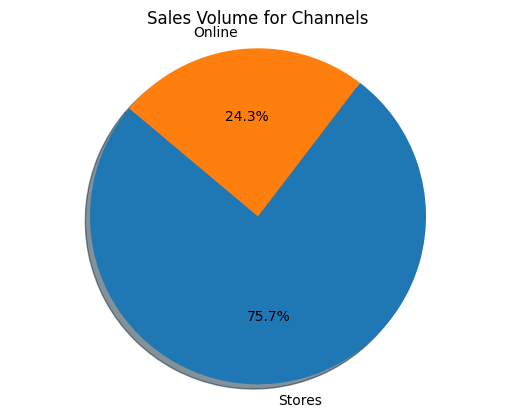

In [24]:
# Get the count of unique values in the 'Channel' column of the 'sales_small' DataFrame
count_values = sales_small['Channel'].value_counts()

# Display the count of each unique value
display(count_values)

# Plot a pie chart to visualize the distribution of 'Channel' values
plt.title('Sales Volume for Channels')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot

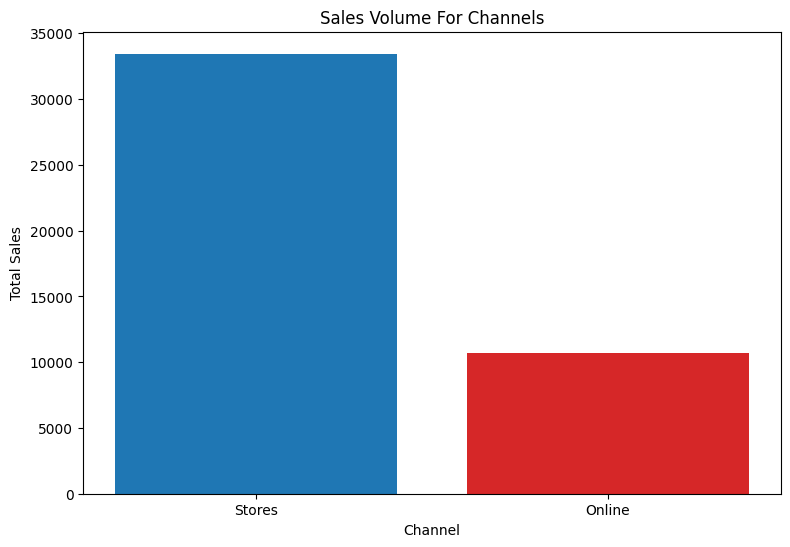

In [25]:
# Get the count of unique values in the 'Channel' column of the 'sales_small' DataFrame
count_values = sales_small['Channel'].value_counts()
# Extract labels and values for the bar chart
labels = count_values.index
values = count_values.values
# Create a bar chart to visualize the distribution of 'Channel' values
plt.figure(figsize=(9, 6))  # Set the figure size for better visibility
plt.bar(labels, values, color=['#1f77b4', '#d62728', 'lightcoral', '#7f7f7f'])  # Create the bar chart
plt.xlabel('Channel')  # Set the label for the x-axis
plt.ylabel('Total Sales')  # Set the label for the y-axis
plt.title('Sales Volume For Channels')  # Add a title to the plot
plt.show()  # Display the plot

Country
B    30579
A    13588
Name: count, dtype: int64

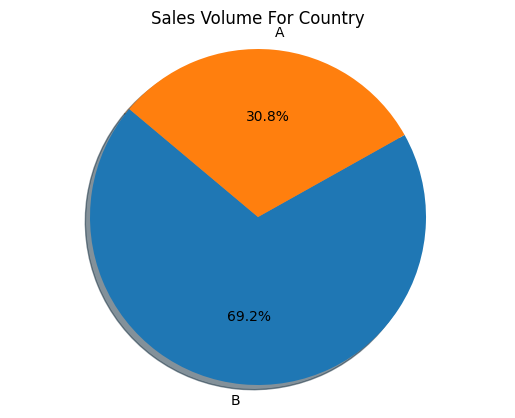

In [26]:
# Get the count of unique values in the 'Country' column of the 'sales_small' DataFrame
count_values = sales_small['Country'].value_counts()
# Display the count of each unique value
display(count_values)
# Plot a pie chart to visualize the distribution of 'Country' values
plt.title('Sales Volume For Country')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot

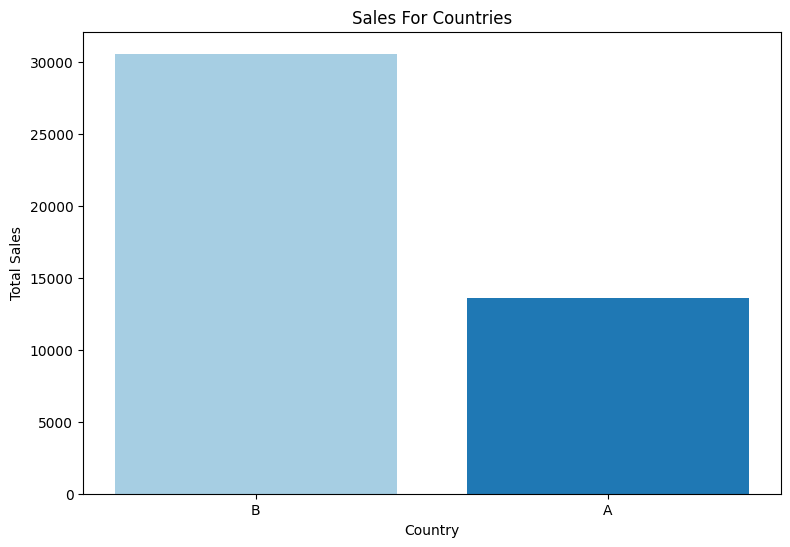

In [27]:
# Get the count of unique values in the 'Country' column of the 'sales_small' DataFrame
count_values = sales_small['Country'].value_counts()
# Extract labels and values for the bar chart
labels = count_values.index
values = count_values.values
# Create a bar chart to visualize the distribution of 'Country' values
plt.figure(figsize=(9, 6))  # Set the figure size for better visibility
colors = plt.cm.Paired(range(len(labels)))  # Generate a range of colors automatically
plt.bar(labels, values, color=colors)  # Create the bar chart
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Total Sales')  # Set the label for the y-axis
plt.title('Sales For Countries')  # Add a title to the plot
plt.show()  # Display the plot

Channel
Stores    13588
Name: count, dtype: int64

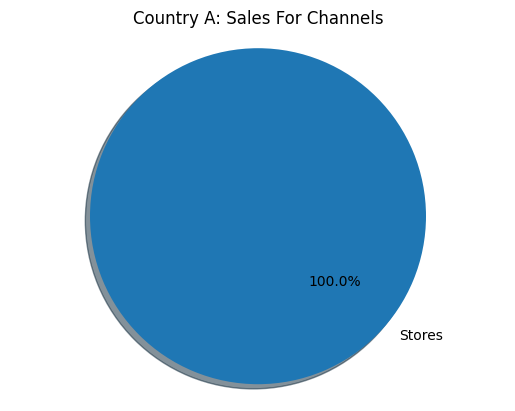

In [28]:
# Get the count of unique values in the 'Channel' column of 'sales_small' for records where 'Country' is 'A'
count_values = sales_small[sales_small['Country'] == 'A']['Channel'].value_counts()
# Display the count of each unique value
display(count_values)
# Plot a pie chart to visualize the distribution of 'Channel' values for Country A
plt.title('Country A: Sales For Channels')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot

Channel
Stores    19859
Online    10720
Name: count, dtype: int64

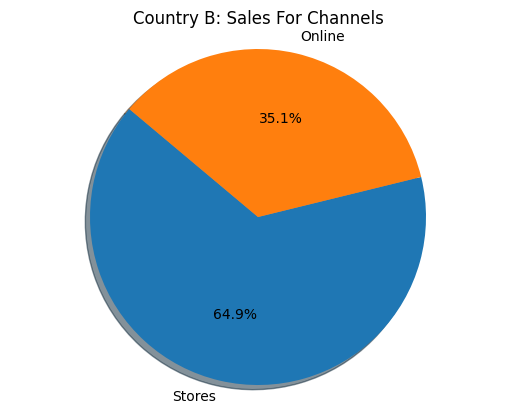

In [29]:
# Get the count of unique values in the 'Channel' column of 'sales_small' for records where 'Country' is 'B'
count_values = sales_small[sales_small['Country'] == 'B']['Channel'].value_counts()
# Display the count of each unique value
display(count_values)
# Plot a pie chart to visualize the distribution of 'Channel' values for Country B
plt.title('Country B: Sales For Channels')  # Add a title to the plot
plt.pie(count_values.values, labels=count_values.index, autopct='%1.1f%%', shadow=True, startangle=140)
# 'values' and 'index' are used to get the counts and corresponding labels, autopct formats the percentages,
# shadow adds a shadow to the plot, startangle sets the angle at which the pie chart starts
plt.axis('equal')  # Set the aspect ratio of the plot to be equal, ensuring a circular pie chart
plt.show()  # Display the plot

In [30]:
# Filter 'sales_small' DataFrame for records where 'Country' is 'B', then group by 'Channel' and sum the 'SalesVolume'
df_country_channel_country_B = sales_small.loc[sales_small['Country']=='B',:].groupby(['Channel'])['SalesVolume'].sum()
# Display the first few rows of the result
df_country_channel_country_B.head()

Channel
Online     30547
Stores    382830
Name: SalesVolume, dtype: int64

In [31]:
# Filter 'sales_small' DataFrame for records where 'Country' is 'A', then group by 'Channel' and sum the 'SalesVolume'
df_country_channel_country_A = sales_small.loc[sales_small['Country']=='A',:].groupby(['Channel'])['SalesVolume'].sum()
# Count the number of records where both 'Country' is 'A' and 'Channel' is 'Online'
df_country_channel_country_A['Online'] = len(sales_small.loc[(sales_small['Country']=='A') & (sales_small['Channel']=='Online'), :])
# Sort the result by index (Channel)
df_country_channel_country_A = df_country_channel_country_A.sort_index()
# Display the first few rows of the result
df_country_channel_country_A.head()

Channel
Online        0
Stores    32031
Name: SalesVolume, dtype: int64

,Country A,Country B
label,,
Online,0,30547
Stores,32031,382830


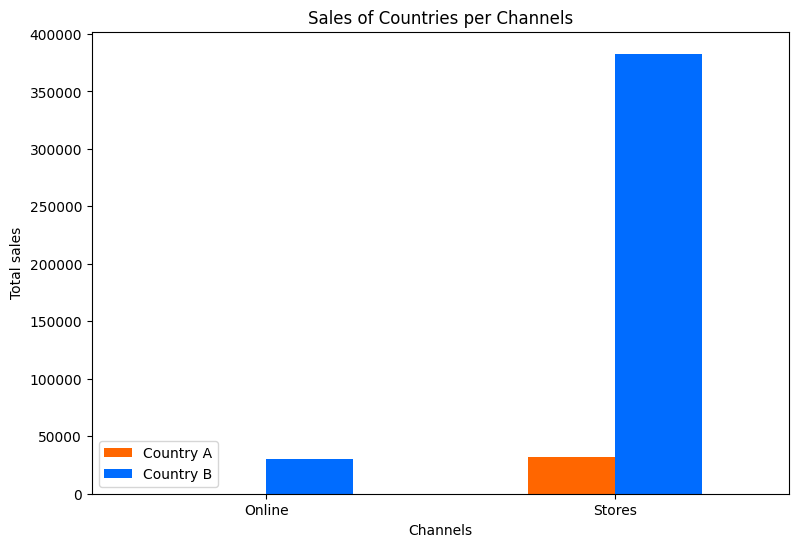

In [32]:
# Create an empty DataFrame to store sales data by country and channel
sales_country_channel = pd.DataFrame()
# Add columns for 'Country A' and 'Country B' with respective sales data
sales_country_channel['Country A'] = df_country_channel_country_A
sales_country_channel['Country B'] = df_country_channel_country_B
# Add a label column with channel names (taken from 'df_country_channel_country_A' index)
sales_country_channel['label'] = df_country_channel_country_A.index
# Set the 'label' column as the index
sales_country_channel = sales_country_channel.set_index('label')
# Display the resulting DataFrame
display(sales_country_channel)
# Create a bar plot to visualize sales by country and channel
fig, ax = plt.subplots(figsize=(9, 6))  # Set the figure size
plt.xlabel('Countries')  # Set the label for the x-axis
plt.title('Sales of Countries per Channels')  # Add a title to the plot
# Plot the bar chart, specifying various parameters for aesthetics
sales_country_channel.plot.bar(ax=ax, capsize=7, rot=0, legend='upper left', color=['#ff6600', '#006cff'],
                               xlabel='Channels', ylabel='Total sales')
plt.legend(loc='lower left')  # Add a legend
plt.show()  # Display the plot

# **Forecasting Weekly sales**<a id="4"></a>

In [33]:
# Group 'sales_small' DataFrame by 'WeekKey'
sales_for_weeks = sales_small.groupby(['WeekKey'])
# Calculate the total sales volume for each week
pre_sales = sales_for_weeks['SalesVolume'].sum()
pre_sales = pd.DataFrame(pre_sales.reset_index()) # Get value counts and convert to DataFrame
pre_sales.columns = ['Week', 'Value'] # Rename the columns
display("Weekly Sales", pre_sales.head(3)) # Display the first few rows of the result


# Filter 'sales_small' DataFrame for records where 'Country' is 'A', then group by 'WeekKey' and sum the 'SalesVolume'
pre_sales_per_country_A = sales_small.loc[sales_small['Country'] == 'A'].groupby(['WeekKey'])['SalesVolume'].sum()
pre_sales_per_country_A = pd.DataFrame(pre_sales_per_country_A.reset_index()) # Get value counts and convert to DataFrame
pre_sales_per_country_A.columns = ['Week', 'Value'] # Rename the columns
# Display the first few rows of the result
display("Weekly Sales in Country A:",pre_sales_per_country_A.head(3))


# Filter 'sales_small' DataFrame for records where 'Country' is 'B', then group by 'WeekKey' and sum the 'SalesVolume'
pre_sales_per_country_B = sales_small.loc[sales_small['Country'] == 'B'].groupby(['WeekKey'])['SalesVolume'].sum()
pre_sales_per_country_B = pd.DataFrame(pre_sales_per_country_B.reset_index()) # Get value counts and convert to DataFrame
pre_sales_per_country_B.columns = ['Week', 'Value'] # Rename the columns
# Display the first few rows of the result
display("Weekly Sales in Country B:", pre_sales_per_country_B.head(3))


# Filter 'sales_small' DataFrame for records where 'Channel' is 'Online', then group by 'WeekKey' and sum the 'SalesVolume'
sales_volume_online = sales_small.loc[sales_small['Channel'] == 'Online'].groupby(['WeekKey'])['SalesVolume'].sum()
sales_volume_online = pd.DataFrame(sales_volume_online.reset_index()) # Get value counts and convert to DataFrame
sales_volume_online.columns = ['Week', 'Value'] # Rename the columns
# Display the first few rows of the result
display("Weekly Sales in Channel Online:", sales_volume_online.head(3))


# Filter 'sales_small' DataFrame for records where 'Channel' is 'Stores', then group by 'WeekKey' and sum the 'SalesVolume'
sales_volume_stores = sales_small.loc[sales_small['Channel'] == 'Stores'].groupby(['WeekKey'])['SalesVolume'].sum()
sales_volume_stores = pd.DataFrame(sales_volume_stores.reset_index()) # Get value counts and convert to DataFrame
sales_volume_stores.columns = ['Week', 'Value'] # Rename the columns
# Display the first few rows of the result
display("Weekly Sales in Channel Stores:", sales_volume_stores.head(3))

'Weekly Sales'

,Week,Value
0,201502,444
1,201503,1451
2,201504,2556


'Weekly Sales in Country A:'

,Week,Value
0,201502,55
1,201503,129
2,201504,198


'Weekly Sales in Country B:'

,Week,Value
0,201502,389
1,201503,1322
2,201504,2358


'Weekly Sales in Channel Online:'

,Week,Value
0,201502,45
1,201503,132
2,201504,208


'Weekly Sales in Channel Stores:'

,Week,Value
0,201502,399
1,201503,1319
2,201504,2348


In [34]:
# Create a DataFrame to store pre-sales information
pre_sales_for_products = pd.DataFrame()

# Assign columns using dictionaries for better organization
pre_sales_for_products['date'] = pre_sales["Week"].astype("str")
pre_sales_for_products['sales_volume_all'] = pre_sales["Value"]
pre_sales_for_products['sales_volume_country_A'] = pre_sales_per_country_A["Value"]
pre_sales_for_products['sales_volume_country_B'] = pre_sales_per_country_B["Value"]
pre_sales_for_products['sales_volume_online'] = sales_volume_online["Value"]
pre_sales_for_products['sales_volume_stores'] = sales_volume_stores["Value"]
pre_sales_for_products.head()

,date,sales_volume_all,sales_volume_country_A,sales_volume_country_B,sales_volume_online,sales_volume_stores
0,201502,444,55,389,45,399
1,201503,1451,129,1322,132,1319
2,201504,2556,198,2358,208,2348
3,201505,3762,306,3456,279,3483
4,201506,4883,362,4521,384,4499


In [35]:
pre_sales_for_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    60 non-null     object
 1   sales_volume_all        60 non-null     int64 
 2   sales_volume_country_A  60 non-null     int64 
 3   sales_volume_country_B  60 non-null     int64 
 4   sales_volume_online     60 non-null     int64 
 5   sales_volume_stores     60 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.9+ KB


In [36]:
def convert_date(data_frame):
    # Convert 'Date' column to datetime format
    data_frame['year'] = data_frame['date'].str[:4]
    data_frame['week'] = data_frame['date'].str[4:]
    # Create a new column with formatted dates
    data_frame['formatted_date'] = data_frame['year'] + '-' + data_frame['week'] + '-0'
    # Convert to datetime
    data_frame['date'] = pd.to_datetime(data_frame['formatted_date'], format='%Y-%U-%w')
    # Drop temporary columns
    data_frame.drop(['year', 'week', 'formatted_date'], axis=1, inplace=True)
    # Set 'Date' column as the index
    data_frame.set_index('date', inplace=True)
    return data_frame

In [37]:
pre_sales_for_products = convert_date (pre_sales_for_products)
pre_sales_for_products.head(5)

,sales_volume_all,sales_volume_country_A,sales_volume_country_B,sales_volume_online,sales_volume_stores
date,,,,,
2015-01-11,444,55,389,45,399
2015-01-18,1451,129,1322,132,1319
2015-01-25,2556,198,2358,208,2348
2015-02-01,3762,306,3456,279,3483
2015-02-08,4883,362,4521,384,4499


'sales_volume_all'

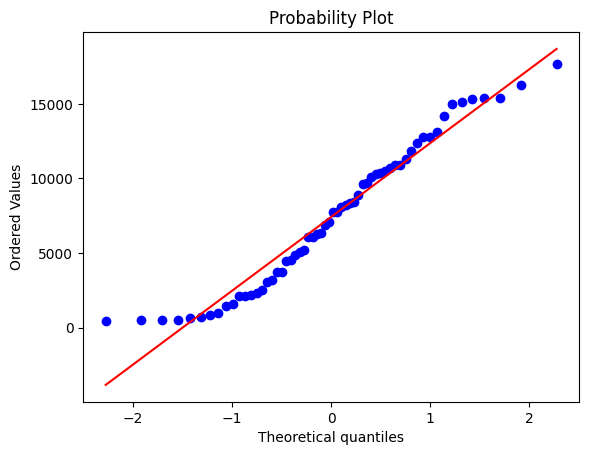

--------------------------------------------------------------------------------


'sales_volume_country_A'

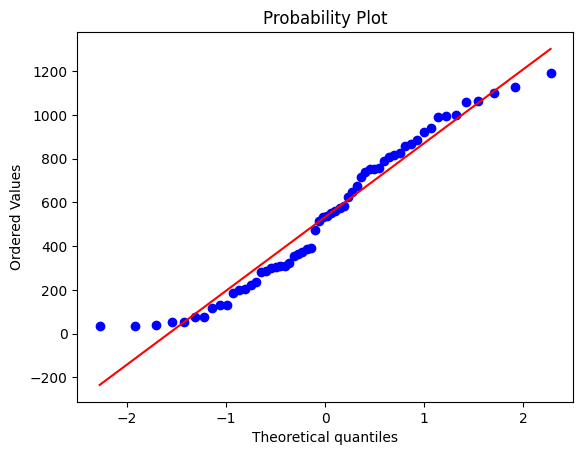

--------------------------------------------------------------------------------


'sales_volume_country_B'

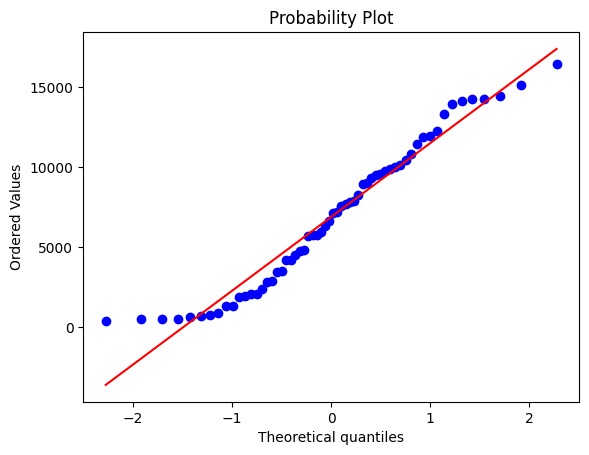

--------------------------------------------------------------------------------


'sales_volume_online'

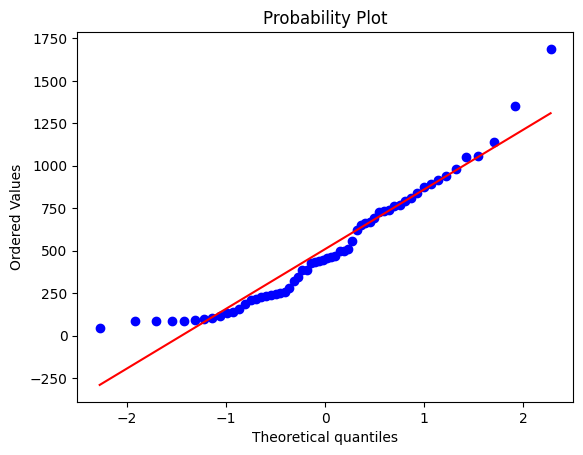

--------------------------------------------------------------------------------


'sales_volume_stores'

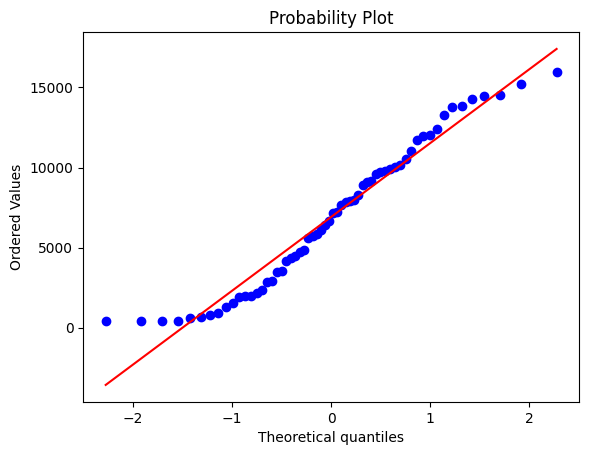

--------------------------------------------------------------------------------


In [38]:
# Iterate over columns in the DataFrame
for col in pre_sales_for_products.columns: 
    # Display the name of the current column
    display(col)
    # Create a probability plot for the data in the current column
    scipy.stats.probplot(pre_sales_for_products[col], plot=pylab)
    # Display the probability plot
    plt.show()
    # Print a separator
    print('----' * 20)
    

In [39]:
pre_sales_for_products.index.freq = 'W'
train = pre_sales_for_products.head(48)
test = pre_sales_for_products.tail(12)

In [40]:
model = VAR(endog=train)
model_fit = model.fit() 

In [41]:
# Forecast sales for the test dataset
forecast = model_fit.forecast(train.values[-model_fit.k_ar:], steps=len(test))

In [42]:
result = list()
for index , row in enumerate(forecast) : 
  result.append({"week":index + 1 , 
                  "sales_volume_all":round(forecast[index][0]),  
                  "sales_volume_per_country_A":round(forecast[index][1]) , 
                  "sales_volume_per_country_B":round(forecast[index][2]) , 
                  "sales_volume_online":round(forecast[index][3]) , 
                  "sales_volume_stores":round(forecast[index][4]) 
                  })

results_df = pd.DataFrame(result)
results_df

,week,sales_volume_all,sales_volume_per_country_A,sales_volume_per_country_B,sales_volume_online,sales_volume_stores
0,1,8386,575,7811,562,7825
1,2,8354,584,7770,572,7782
2,3,8313,589,7724,573,7740
3,4,8286,592,7694,574,7712
4,5,8270,594,7675,574,7695
5,6,8260,596,7664,574,7685
6,7,8254,597,7658,575,7679
7,8,8251,597,7654,575,7677
8,9,8250,598,7652,575,7675
9,10,8250,598,7652,575,7675


In [43]:
# Get the residuals
residuals = test.values - forecast
residuals = pd.DataFrame(residuals, columns=test.columns)

Shapiro-Wilk Test Statistic: 0.9730, p-value: 0.9394


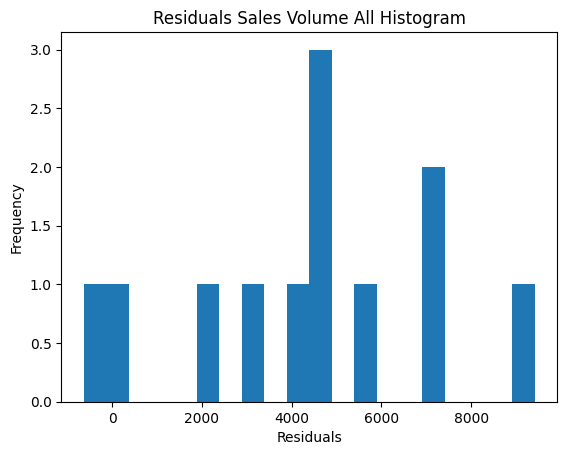

In [44]:
# Perform normality test (e.g., Shapiro-Wilk test)
stat, p_value = shapiro(residuals["sales_volume_all"])
print(f'Shapiro-Wilk Test Statistic: {stat:.4f}, p-value: {p_value:.4f}')

# Plot a histogram of the residuals
plt.hist(residuals["sales_volume_all"], bins=20)
plt.title('Residuals Sales Volume All Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [45]:
model = VAR(endog=pre_sales_for_products)
model_fit = model.fit() 
# Forecast sales for the next four weeks (4 steps ahead)
forecast = model_fit.forecast(train.values[-model_fit.k_ar:], steps=4)
result = list()
for index , row in enumerate(forecast) : 
  result.append({"week":index + 1 , 
                  "sales_volume_all":round(forecast[index][0]),  
                  "sales_volume_per_country_A":round(forecast[index][1]) , 
                  "sales_volume_per_country_B":round(forecast[index][2]) , 
                  "sales_volume_online":round(forecast[index][3]) , 
                  "sales_volume_stores":round(forecast[index][4]) 
                  })

results_df = pd.DataFrame(result)
results_df

,week,sales_volume_all,sales_volume_per_country_A,sales_volume_per_country_B,sales_volume_online,sales_volume_stores
0,1,8498,584,7914,565,7933
1,2,8608,601,8007,578,8030
2,3,8742,617,8126,591,8151
3,4,8887,630,8257,604,8284


In [46]:
results_df.to_csv('forecasting_weekly_sales.csv' , index=False)

# **Impact of Pricing on Sales** <a id="5"></a>

In [47]:
# Merge 'sales_small' DataFrame with 'products' DataFrame based on the 'ProductID' column
# This operation combines the two DataFrames using a common column as the key
sales_small_and_products = pd.merge(sales_small, products, how="inner", on="ProductID")

In [48]:
# Merge 'sales_small_and_products' DataFrame with 'price_changes' DataFrame based on multiple columns
# This operation combines the two DataFrames using multiple columns as the keys
data = pd.merge(
    sales_small_and_products, 
    price_changes, 
    how='inner', 
    on=['ProductID', 'WeekKey', 'Channel', 'Country'])

In [49]:
data.head()

,ProductID,Channel,Country,WeekKey,CSP_x,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,...,StoresWithStockCount,StoresWithSalesCount,Season,Group,SubGroup,Class,SubClass,OSP,previous_CSP,CSP_y
0,135fc45e,Stores,B,201507,16.283,13,31,19,12,0,...,0.2410,0.0428,L,26387251,c3567a18,8face522,641d430c,18.984,18.984,16.283
1,135fc45e,Stores,B,201508,14.483,26,34,22,11,0,...,0.2565,0.0816,L,26387251,c3567a18,8face522,641d430c,18.984,16.283,14.483
2,135fc45e,Stores,B,201512,13.133,52,19,19,0,0,...,0.8045,0.1827,L,26387251,c3567a18,8face522,641d430c,18.984,14.483,13.133
3,135fc45e,Stores,B,201546,10.882,4,0,0,0,0,...,0.0000,0.0078,L,26387251,c3567a18,8face522,641d430c,18.984,13.133,10.882
4,1ff41410,Stores,A,201519,12.908,1,0,0,0,0,...,0.0000,0.0117,L,bca94c97,44b005af,c409cf28,8a0d6232,15.833,15.833,12.908


In [50]:
data["change_amount"] = data['CSP_x']  - data['OSP']
del data['CSP_x']

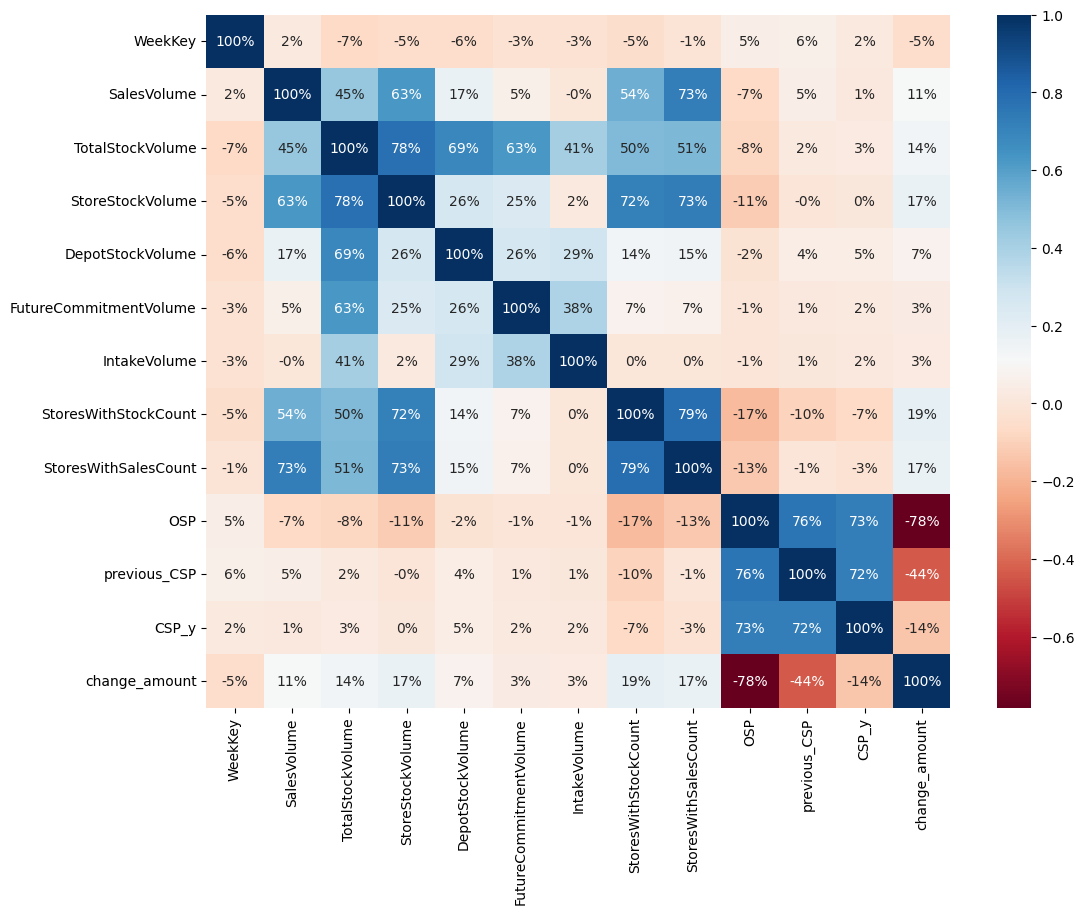

In [51]:
numerical_columns = data.select_dtypes(include=['integer', 'float'])
plt.figure(figsize=(12,9))
sns.heatmap(numerical_columns.corr(),cmap='RdBu', annot=True,fmt=".0%")
plt.show()

In [52]:
data.sample(5)

,ProductID,Channel,Country,WeekKey,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,IntakeVolume,...,StoresWithSalesCount,Season,Group,SubGroup,Class,SubClass,OSP,previous_CSP,CSP_y,change_amount
934,9e57043e,Stores,A,201507,8,2,2,0,0,0,...,0.0194,L,26387251,c3567a18,c7b04e18,ef307285,12.908,12.908,11.445,-1.463
255,dedf7ec6,Stores,A,201524,0,0,0,0,0,0,...,0.0000,L,bca94c97,c830b21c,7f5a3521,d09982e0,12.232,11.107,10.545,-1.687
2700,c21df3c7,Stores,B,201607,55,28,28,0,0,0,...,0.2060,L,606565a1,33de6bfe,83b19c60,35361cb0,11.557,11.557,10.657,-0.900
554,5ecbfa2b,Stores,A,201519,7,5,5,0,0,0,...,0.0194,L,606565a1,33de6bfe,8f5e4e2f,52fc415a,12.908,12.908,11.445,-1.463
203,bc79b74,Online,B,201524,2,0,0,0,0,0,...,0.0039,L,26387251,cd1e4750,cd1e4750,4f7e2f99,15.383,15.383,12.683,-2.700


Group
26387251    26428
edf80f3a    10680
bca94c97     8462
606565a1     5244
c8e7b2df     1291
49e9a58f       28
3bc0de94       10
Name: SalesVolume, dtype: int64


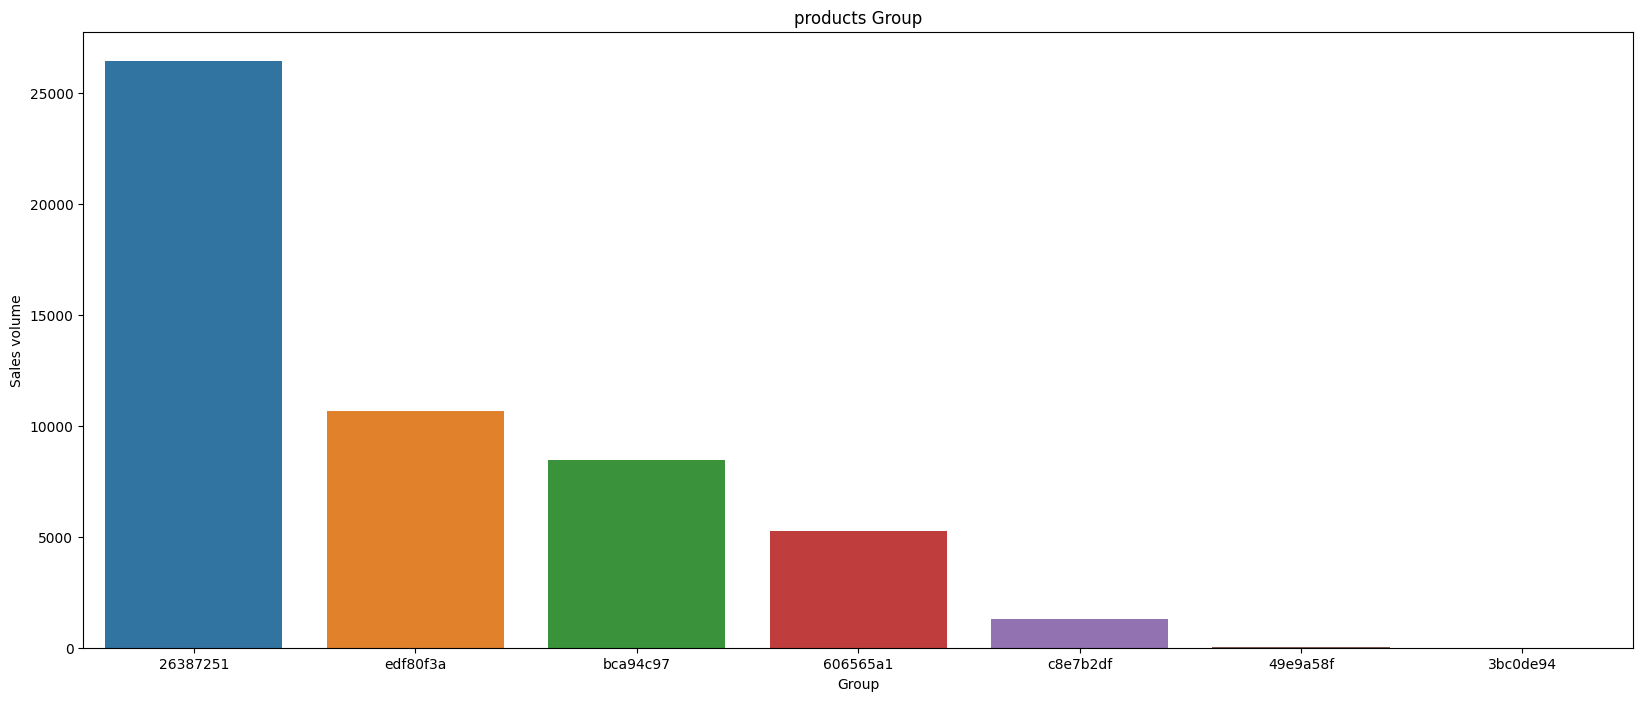

Number of Group : 7


In [53]:
count_values = data.groupby(['Group'])['SalesVolume'].sum().sort_values(ascending=False)
print(count_values)
# Plot
plt.figure(figsize=(20,8))
sns.barplot(x=count_values.index ,y=count_values)
plt.xlabel('Group')
plt.ylabel('Sales volume')
plt.title('products Group')
plt.show()
print('Number of Group : {}'.format(len(count_values)))

SubGroup
c3567a18    18615
edf80f3a    10674
14edd834     7757
44b005af     4260
33de6bfe     3469
c830b21c     3063
c8e7b2df     1272
9d3d7fe0     1205
8f7078c4     1129
eb5237dd      570
cd1e4750       56
71eae2d8       28
fb23693f       19
c3257b11       10
cddaa128       10
b5ae3139        6
Name: SalesVolume, dtype: int64


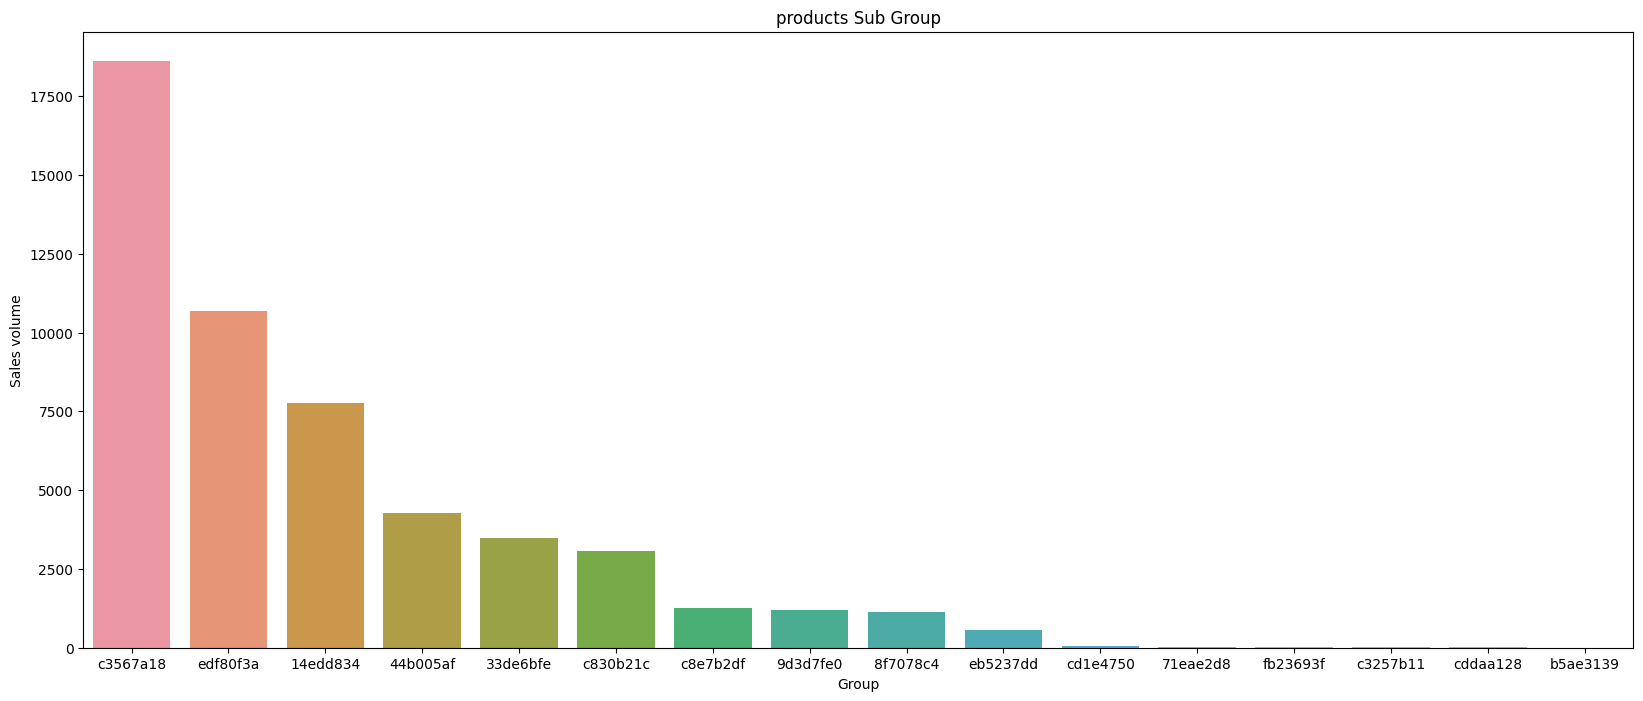

Number of Group : 16


In [54]:
count_values = data.groupby(['SubGroup'])['SalesVolume'].sum().sort_values(ascending=False)
print(count_values)
# Plot
plt.figure(figsize=(20,8))
sns.barplot(x=count_values.index ,y=count_values)
plt.xlabel('Group')
plt.ylabel('Sales volume')
plt.title('products Sub Group')
plt.show()
print('Number of Group : {}'.format(len(count_values)))

# **Pricing Strategy Recommendations** <a id="6"></a>

In [55]:
rec_data = data.sort_values(by='ProductID', ascending=False)

In [56]:
rec_data.head(5)

,ProductID,Channel,Country,WeekKey,SalesVolume,TotalStockVolume,StoreStockVolume,DepotStockVolume,FutureCommitmentVolume,IntakeVolume,...,StoresWithSalesCount,Season,Group,SubGroup,Class,SubClass,OSP,previous_CSP,CSP_y,change_amount
2287,ffe6e191,Online,B,201524,10,3,0,3,0,0,...,0.0039,L,26387251,14edd834,96d57a3c,4e83142f,16.283,16.283,13.133,-3.150
975,ffc5de9e,Stores,B,201517,11,1,1,0,0,0,...,0.0583,L,26387251,14edd834,583c131b,3906b741,18.984,18.984,15.383,-3.601
976,ffc5de9e,Stores,B,201519,2,1,1,0,0,0,...,0.0194,L,26387251,14edd834,583c131b,3906b741,18.984,15.383,12.683,-6.301
2215,ffa28e85,Stores,A,201523,2,0,0,0,0,0,...,0.0039,L,26387251,c3567a18,1ed9f279,6797d7af,14.033,11.715,14.033,0.000
2216,ffa28e85,Stores,B,201523,8,9,9,0,0,0,...,0.0700,L,26387251,c3567a18,1ed9f279,6797d7af,13.133,11.332,13.133,0.000


> 1- Increase the number of goods in the warehouse in the L season

> 2- Increase the number of products in stock from the following groups ( 26387251 ,606565a1 ,bca94c97 ,c8e7b2df , edf80f3a )

> 3- Do not keep any products in stock from the following groups ( 3bc0de94 , 49e9a58f )

> 4- Addition of the online purchase service in country A

> 5- Developing and improving the marketing of online stores in the country B

> 6- We observed a strong correlation between the number of goods in stock and the volume of sales

> 7- The lower the price of the product, the higher the percentage of sales by 11%
